# 6.6 Time Series Analysis

## Table of Contents
### 1. Importing Libraries and Data
### 2. Code Monthly Aggregation of Total Quantity
### 3. Plot Time Series as Line Chart
### 4. Time Series Decomposition
### 5. Dickey-Fuller Test for Stationarity
### 6. Autocorrelations
### 7. Aggregate Total USD by Month & Create Line Chart of Monthly Revenue
### 8. Decompose Revenue Series
### 9. Dickey-Fuller Test
### 10. Autocorrelation
### 11. Facebook Prophet Forecast Analysis
#### 11.1 Total Quantity (Number of Pieces) Forecasting
#### 11.2 Total USD (Monthly Revenue) Forecasting
### 12. Export Dataframes

### 1. Importing Libraries and Data

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [9]:
# Define Path
path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis'

# Import Sales Invoice Extended Data
invoice_file_path = os.path.join(path, '02 Data', 'Prepared Data', '6.4', 'invoice_enriched_ext.csv')
invoice_df = pd.read_csv(invoice_file_path)

# check output
invoice_df.head()

,invoice_number,Date,Company_Name,Brand_Name,Total,Customer_Category,Trade_Type,Total_Quantity,Country,Total_USD
0,000030-024170-20240508-000447,2024-05-08,marina bay sands,MBS,7740.0,Hotel,Export,516.0,Singapore,7740.0
1,00003093043220250310000023,2025-03-10,"cprc (maldives) pvt, ltd (ritz carlton maldives)",Ritz Carlton Maldives,2150.0,Hotel,Export,225.0,Maldives,2150.0
2,004817#08010000025220250201000912,2025-02-01,al ghalia w.l.l,Jihad,1016.6,Agent,Export,60.0,Bahrain,1016.6
3,005/KEVALA/OUT/III/2024,2024-06-01,six senses amaala,Amaala,596.5,Hotel,Export,50.0,Saudi Arabia,596.5
4,006830#00003002238320250212043298,2025-02-13,renarte general trading llc,Renarte,984.0,Agent,Export,48.0,United Arab Emirates,984.0


### 2. Code Monthly Aggregation of Total Quantity

In [11]:
# Ensure 'Date' is datetime
invoice_df['Date'] = pd.to_datetime(invoice_df['Date'])

# Group by month and sum Total_Quantity
monthly_quantity = invoice_df.groupby(pd.Grouper(key='Date', freq='M'))['Total_Quantity'].sum().reset_index()

# Set the index for time series analysis
monthly_quantity = monthly_quantity.set_index('Date')

# Preview the resulting series
monthly_quantity.head(20)


C:\Users\daxma\AppData\Local\Temp\ipykernel_9044\1929518950.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_quantity = invoice_df.groupby(pd.Grouper(key='Date', freq='M'))['Total_Quantity'].sum().reset_index()


,Total_Quantity
Date,
2023-01-31,14616.0
2023-02-28,8083.0
2023-03-31,14134.0
2023-04-30,12889.0
2023-05-31,25720.0
2023-06-30,15223.0
2023-07-31,26495.0
2023-08-31,16257.0
2023-09-30,12216.0


### 3. Plot Time Series as Line Chart

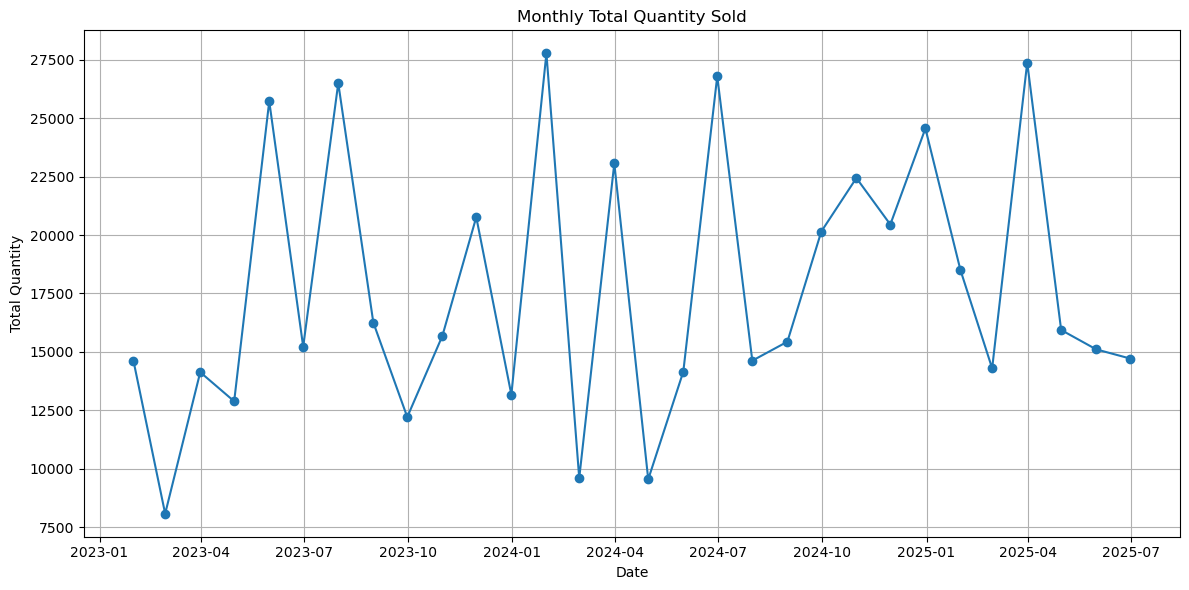

In [13]:
# Define save path
save_path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis\04 Analysis\Visualisations\6.6'
os.makedirs(save_path, exist_ok=True)

# Plot figure
plt.figure(figsize=(12, 6))
plt.plot(monthly_quantity, marker='o', linestyle='-')
plt.title('Monthly Total Quantity Sold')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.tight_layout()

# File name and save
filename = os.path.join(save_path, 'monthly_total_quantity.png')
plt.savefig(filename, dpi=300)
plt.show()


### 4. Time Series Decomposition

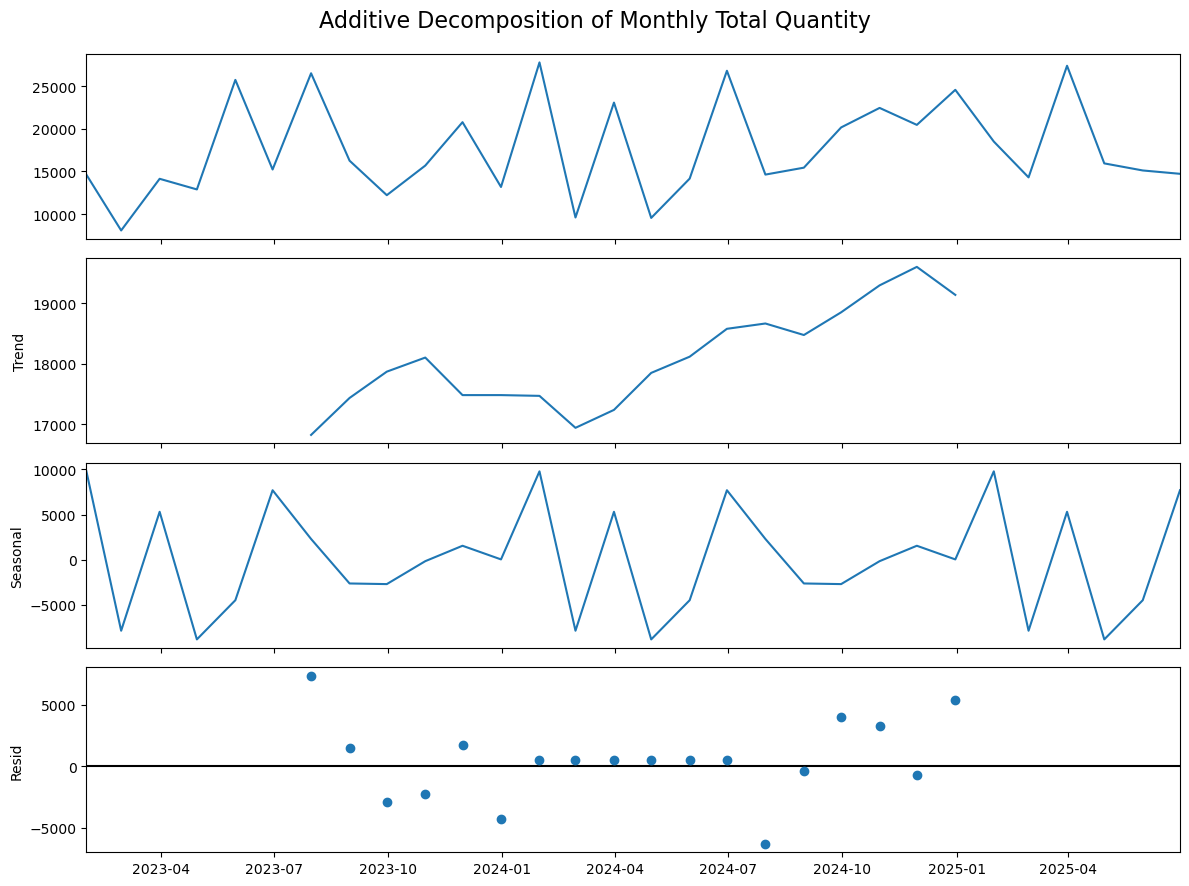

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_quantity, model='additive', period=12)

# Plot the components
fig = decomposition.plot()
fig.set_size_inches(12, 9)
plt.suptitle('Additive Decomposition of Monthly Total Quantity', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # adjust for suptitle
plt.show()


In [16]:
# Save the decomposition plot
decomp_filename = os.path.join(save_path, 'decomposition_additive_quantity.png')
fig.savefig(decomp_filename, dpi=300)


#### Time Series Decomposition of Monthly Total Quantity

1. Trend Component
From April to August 2023, the trend line starts flat and slightly below the midline.

- Between September and November 2023, the trend increases steadily, reflecting a growth in demand entering the latter part of the year.

- From December 2023 to March 2024, the trend temporarily flattens and slightly dips, suggesting a seasonal slowdown or stabilization.

- From April 2024 to January 2025, the trend resumes a gradual upward trajectory, reaching a peak near 19,500 units by the start of 2025.

- A small flattening is visible in early 2025, potentially indicating saturation or the start of a new plateau.

2. Seasonal Component
- The seasonal pattern repeats approximately every 12 months, with clear positive seasonal spikes in June, September, and December, suggesting these are peak ordering periods.

- Corresponding seasonal dips appear in April, July, and October, indicating possible slow periods.

- The amplitude of the seasonal swings remains fairly consistent across time, suggesting stable, recurring cyclical behavior.


3. Residual Component
- Residuals are moderately large in the early months (e.g., June–October 2023), likely reflecting unmodeled irregularities or one-off bulk orders.

- The residuals tighten and center around zero more consistently from late 2023 through mid-2024, indicating the trend and seasonality components explain more of the variation during this period.

- A few notable outliers reappear around October 2024 and February 2025, which could be unexpected demand shifts or data irregularities.

Summary
- The series displays a clear upward trend, with signs of steady growth in customer demand.

- The seasonality is strong and consistent, peaking roughly every 3–4 months.

- Residuals suggest that while the decomposition captures the main structure well, some months show unexpected variability, possibly tied to one-off large orders.

### 5. Dickey-Fuller Test for Stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller

# Define Dickey-Fuller test function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply the function to the monthly quantity series
dickey_fuller(monthly_quantity['Total_Quantity'])


Dickey-Fuller Stationarity test:
Test Statistic                -6.851852e+00
p-value                        1.686395e-09
Number of Lags Used            0.000000e+00
Number of Observations Used    2.900000e+01
Critical Value (1%)           -3.679060e+00
Critical Value (5%)           -2.967882e+00
Critical Value (10%)          -2.623158e+00
dtype: float64


#### Dickey-Fuller Test for Stationarity
Test Output Summary:

- Since the test statistic is well below all critical values and the p-value is significantly less than 0.05, we reject the null hypothesis that the series is non-stationary.

- Therefore, the monthly quantity series is stationary.

- This means we do not need to apply differencing, and the current series is suitable for forecasting.

### 6. Autocorrelations

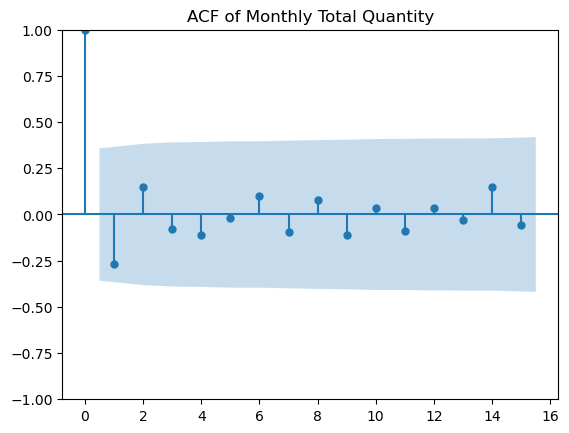

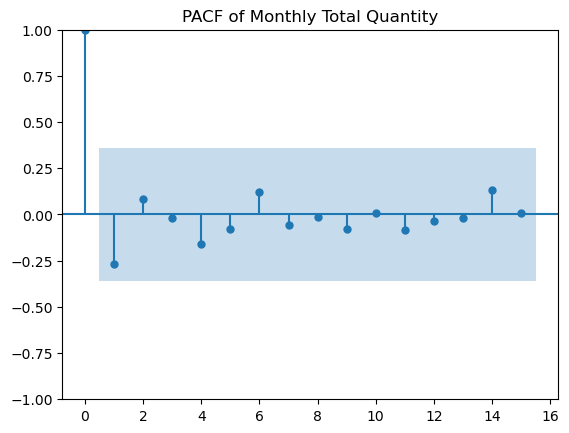

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define save path
save_path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis\04 Analysis\Visualisations\6.6'
os.makedirs(save_path, exist_ok=True)

# ACF Plot
acf_fig = plot_acf(monthly_quantity['Total_Quantity'])
plt.title('ACF of Monthly Total Quantity')
acf_filepath = os.path.join(save_path, 'acf_monthly_quantity.png')
plt.savefig(acf_filepath, dpi=300)
plt.show()

# PACF Plot
pacf_fig = plot_pacf(monthly_quantity['Total_Quantity'], method='ywm')
plt.title('PACF of Monthly Total Quantity')
pacf_filepath = os.path.join(save_path, 'pacf_monthly_quantity.png')
plt.savefig(pacf_filepath, dpi=300)
plt.show()


#### Autocorrelation Analysis and Next Step
- The ACF and PACF plots of the monthly total quantity data reveal a strong autocorrelation at lag 1, with a tapering pattern in the ACF and a significant spike only at lag 1 in the PACF. This suggests a short-term memory in the series, consistent with an AR(1) structure.

- Given the clear seasonality, business context, and the need for forward-looking forecasting, the recommended next step is to use Facebook Prophet. Prophet is well-suited for retail and operations-style time series, automatically handles trends and seasonal patterns, and enables robust forecasting with minimal manual parameter tuning.

### 7. Aggregate Total USD by Month & Create Line Chart of Monthly Revenue

In [25]:
# Convert 'Date' column to datetime if not already
invoice_df['Date'] = pd.to_datetime(invoice_df['Date'])

# Group by month and sum Total_USD
monthly_usd = invoice_df.groupby(pd.Grouper(key='Date', freq='M'))['Total_USD'].sum().reset_index()

# Set index for time series analysis
monthly_usd = monthly_usd.set_index('Date')

# Preview result
monthly_usd.head()


C:\Users\daxma\AppData\Local\Temp\ipykernel_9044\2360612896.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_usd = invoice_df.groupby(pd.Grouper(key='Date', freq='M'))['Total_USD'].sum().reset_index()


,Total_USD
Date,
2023-01-31,165255.600702
2023-02-28,130209.429515
2023-03-31,180996.890081
2023-04-30,147412.865334
2023-05-31,269981.371694


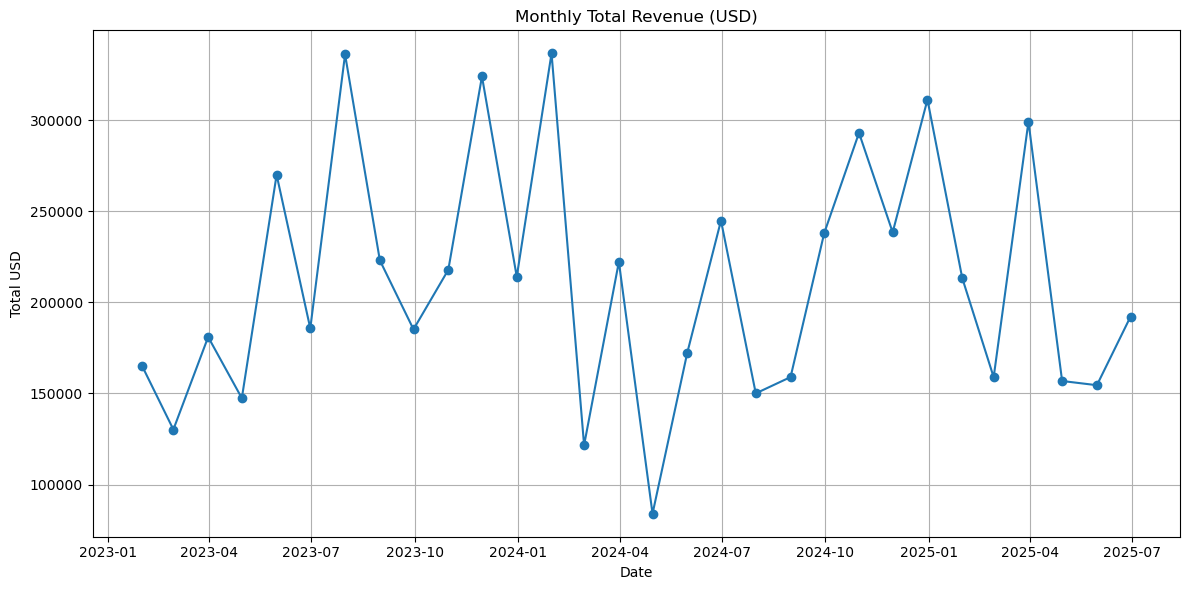

In [26]:
# Define save path
save_path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis\04 Analysis\Visualisations\6.6'
os.makedirs(save_path, exist_ok=True)

# Plot and save line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_usd, marker='o', linestyle='-')
plt.title('Monthly Total Revenue (USD)')
plt.xlabel('Date')
plt.ylabel('Total USD')
plt.grid(True)
plt.tight_layout()

plt.savefig(os.path.join(save_path, 'monthly_total_usd.png'), dpi=300)
plt.show()


### 8. Decompose Revenue Series

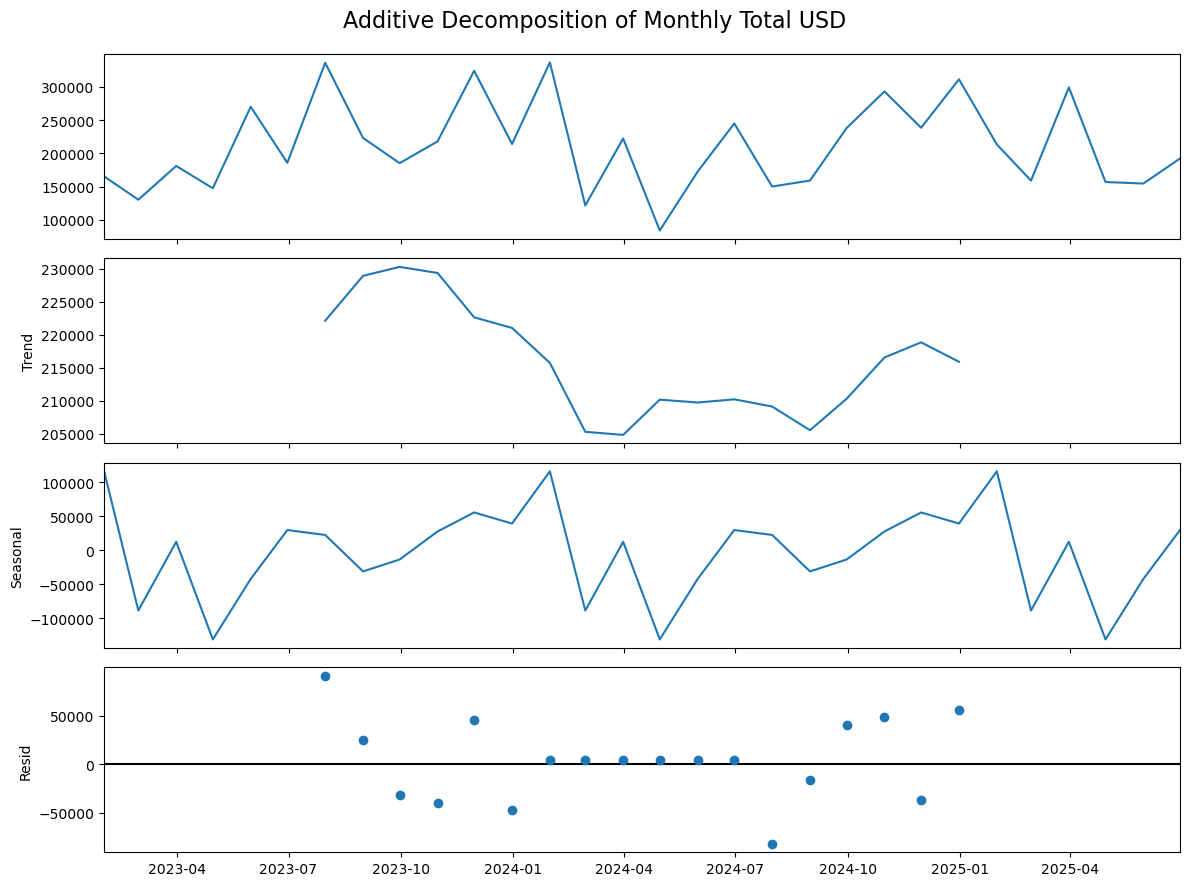

In [28]:
# Decompose using additive model
decomp_usd = seasonal_decompose(monthly_usd, model='additive', period=12)

# Plot and save decomposition
fig = decomp_usd.plot()
fig.set_size_inches(12, 9)
plt.suptitle('Additive Decomposition of Monthly Total USD', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)

plt.savefig(os.path.join(save_path, 'decomposition_additive_usd.png'), dpi=300)
plt.show()


#### Time Series Decomposition of Monthly Total USD

Trend
- From April 2023 to November 2023, the trend shows a consistent upward movement in total revenue, peaking around late 2023.

- Between December 2023 and June 2024, the trend plateaus and then slightly declines, suggesting a possible market slowdown or shift in order composition.

- A modest recovery begins around July 2024, with a steady increase continuing into early 2025.

Seasonality
- There is a pronounced and repeating seasonal pattern, with clear revenue peaks around June, September, and December, mirroring the same periodicity observed in the quantity decomposition.

- Revenue troughs occur consistently in April, July, and October, indicating predictable dips in purchasing activity or billing cycles.

Residuals
- Residuals fluctuate around zero with moderate variance, particularly in the early and late months.

- Significant positive and negative residuals in mid-2023 and late 2024 suggest temporary anomalies, possibly one-off large orders, not explained by trend or seasonality.

Summary
- The revenue series behaves similarly to the quantity series, with seasonal peaks aligning across both.

- However, the trend in revenue is flatter, especially in 2024, which may reflect shifts in pricing strategy or product mix.

- This supports modeling both revenue and quantity for a more complete understanding of business performance.

### 9. Dickey-Fuller Test

In [31]:
# Define and run test
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result[f'Critical Value ({key})'] = value
    print(result)

# Apply to Total_USD
dickey_fuller(monthly_usd['Total_USD'])


Dickey-Fuller Stationarity test:
Test Statistic                 -5.484705
p-value                         0.000002
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


#### Dickey-Fuller Test for Stationarity (Total USD)

- Since the p-value is well below 0.05 and the test statistic is lower than all critical values, we reject the null hypothesis.

- The Total_USD series is stationary and does not require differencing before forecasting.

### 10. Autocorrelation

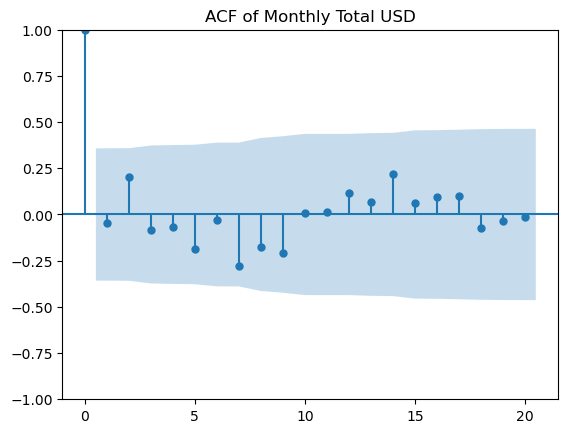

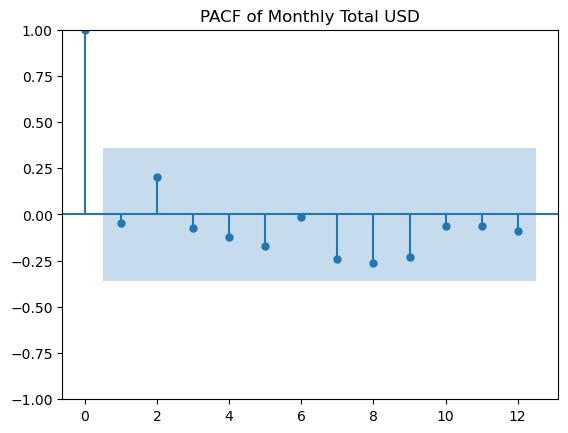

In [34]:
# ACF plot
acf_usd_fig = plot_acf(monthly_usd['Total_USD'], lags=20)
plt.title('ACF of Monthly Total USD')
plt.savefig(os.path.join(save_path, 'acf_monthly_usd.png'), dpi=300)
plt.show()

# PACF plot
pacf_usd_fig = plot_pacf(monthly_usd['Total_USD'], lags=12, method='ywm')
plt.title('PACF of Monthly Total USD')
plt.savefig(os.path.join(save_path, 'pacf_monthly_usd.png'), dpi=300)
plt.show()



#### Autocorrelation Analysis (Total USD)
- The ACF plot shows a strong spike at lag 1 followed by minor fluctuations that stay mostly within the confidence interval, suggesting short-term autocorrelation with limited persistence across lags.

- The PACF plot also shows a significant spike at lag 1, with all subsequent lags falling within the bounds. This points toward an AR(1) structure, similar to the quantity data.

- These results support the use of Prophet, especially since the data also exhibits clear seasonality.



### 11. Facebook Prophet Forecast Analysis

#### Forecasting Method Justification
Facebook Prophet was chosen as the forecasting method for this analysis due to its strong handling of trend and seasonality in business data. Prophet is particularly well-suited for operational forecasting in settings like Kevala Ceramics, where customer orders follow regular cycles, and demand patterns evolve gradually. Unlike ARIMA, Prophet requires minimal parameter tuning and provides interpretable output ideal for communicating insights to non-technical stakeholders.

#### 11.1 Total Quantity (Number of Pieces) Forecasting

In [39]:
# Step 1: Format monthly quantity data for Prophet
prophet_df = monthly_quantity.reset_index().rename(columns={
    'Date': 'ds',
    'Total_Quantity': 'y'
})

# Preview the result
prophet_df.head()


,ds,y
0,2023-01-31,14616.0
1,2023-02-28,8083.0
2,2023-03-31,14134.0
3,2023-04-30,12889.0
4,2023-05-31,25720.0


In [67]:
from prophet import Prophet

# Initialise the model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)


15:39:23 - cmdstanpy - INFO - Chain [1] start processing
15:39:25 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
# Create future dataframe (monthly steps)
future = model.make_future_dataframe(periods=6, freq='M')  # Change 6 to 12 if you want a full year

# Predict future values
forecast = model.predict(future)

# Preview forecasted data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


C:\Users\daxma\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
26,2025-03-31,24131.236107,20917.167571,27280.481847
27,2025-04-30,14106.173281,10993.768118,17552.879347
28,2025-05-31,18680.102520,15348.855617,22005.860376
29,2025-06-30,21627.226698,18361.901432,24832.294870
30,2025-07-31,20886.318335,17533.611958,24275.511916
31,2025-08-31,17854.016295,14656.077148,21375.336046
32,2025-09-30,19301.978521,16024.749806,22546.606293
33,2025-10-31,21656.541935,18325.275246,24789.480804
34,2025-11-30,21930.866492,18846.520151,25360.283045
35,2025-12-31,22134.655552,18710.622972,25746.776942


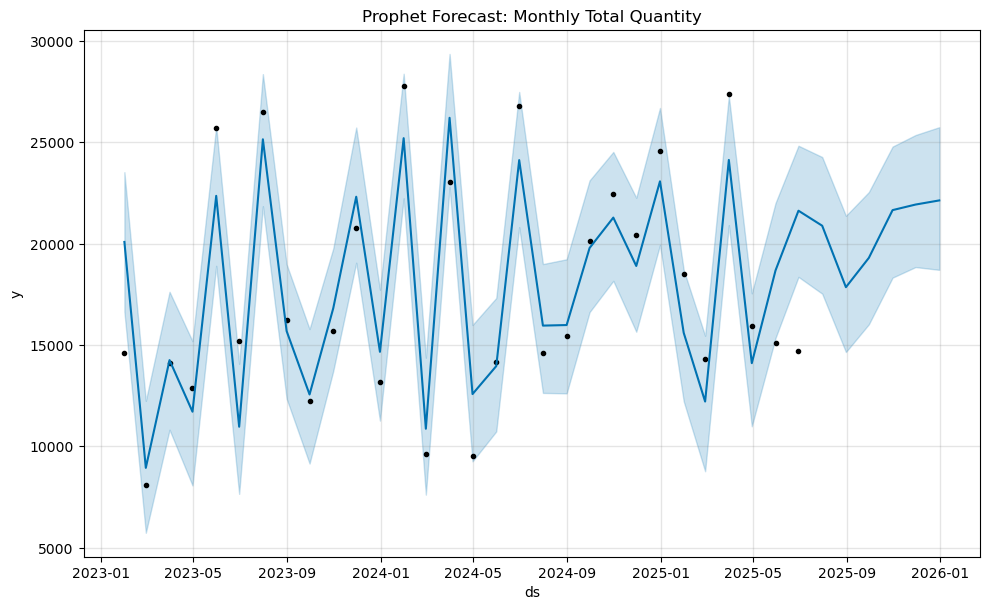

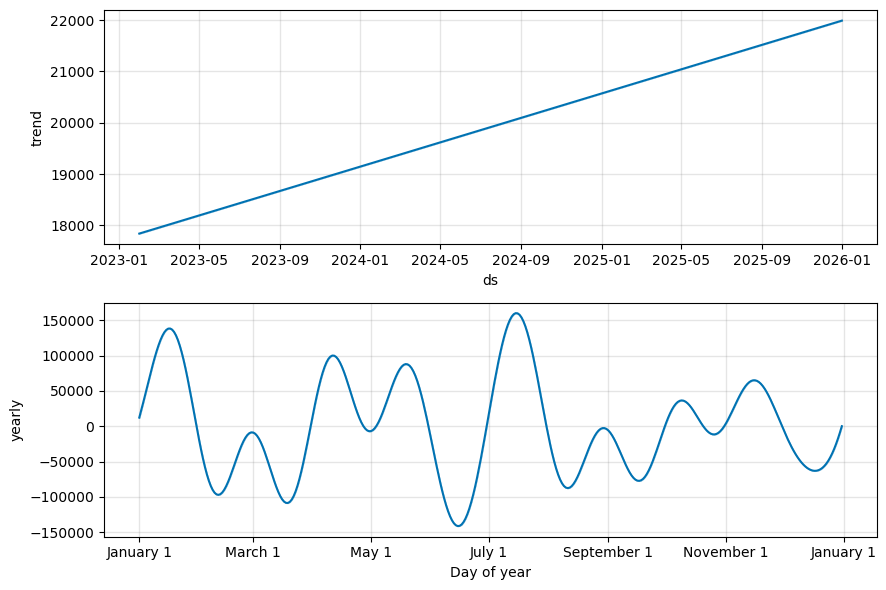

In [71]:
from prophet.plot import plot_components

# Define save path
save_path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis\04 Analysis\Visualisations\6.6'
os.makedirs(save_path, exist_ok=True)

# Forecast plot
fig1 = model.plot(forecast)
plt.title('Prophet Forecast: Monthly Total Quantity')
fig1.savefig(os.path.join(save_path, 'prophet_forecast_quantity.png'), dpi=300)
plt.show()

# Components plot
fig2 = plot_components(model, forecast)
fig2.savefig(os.path.join(save_path, 'prophet_components_quantity.png'), dpi=300)
plt.show()


#### Prophet Forecast Interpretation – Monthly Total Quantity

Forecast Overview
- The model predicts a steady upward trend in monthly quantity over the next 6 months, consistent with Kevala’s growth trajectory.

- Forecast intervals widen over time, reflecting increasing uncertainty, but the trend remains positive.

- Observed historical spikes (e.g., mid-year and end-of-year) are followed by projected surges in similar months, suggesting consistent bulk order cycles.

Trend Component
- The underlying trend line shows gradual, linear growth from 2023 through early 2026, aligning with Kevala’s strategic goal of expanding international demand.

Seasonality Component
- The model identifies strong repeating peaks around January, May, and August, and dips around March and June.

- This cyclical pattern likely reflects quarterly restocking or buying cycles from international partners, especially wholesale or hospitality clients.

- The strong seasonality reinforces the need for production planning around these known peak months.

Strategic Insight
This forecast can directly inform Kevala’s:

- Inventory preparation for peak months

- Manufacturing resource allocation

- Export and logistics planning, particularly during high-volume quarters



#### 11.2 Total USD (Monthly Revenue) Forecasting

In [75]:
# Format monthly revenue data for Prophet
prophet_usd = monthly_usd.reset_index().rename(columns={
    'Date': 'ds',
    'Total_USD': 'y'
})

# Preview the data
prophet_usd.head()


,ds,y
0,2023-01-31,165255.600702
1,2023-02-28,130209.429515
2,2023-03-31,180996.890081
3,2023-04-30,147412.865334
4,2023-05-31,269981.371694


In [77]:
# Initialize the Prophet model
model_usd = Prophet()

# Fit to the Total_USD data
model_usd.fit(prophet_usd)


15:53:22 - cmdstanpy - INFO - Chain [1] start processing
15:53:22 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
# Create future dataframe for the next 6 months
future_usd = model_usd.make_future_dataframe(periods=6, freq='M')

# Generate forecast
forecast_usd = model_usd.predict(future_usd)

# Preview forecast output
forecast_usd[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


C:\Users\daxma\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
26,2025-03-31,245937.014045,206064.546690,284995.137414
27,2025-04-30,130263.306714,90301.017433,170549.470399
28,2025-05-31,195322.301090,159160.058216,234321.898212
29,2025-06-30,221280.711123,181747.519665,259637.652730
30,2025-07-31,223069.907811,184201.943346,262349.380349
31,2025-08-31,190555.221010,153087.376332,229709.746093
32,2025-09-30,227111.935635,191397.282418,263970.333083
33,2025-10-31,270506.603048,229838.339343,308902.274630
34,2025-11-30,267936.225968,230255.490552,306896.942252
35,2025-12-31,279154.448671,238007.221309,316578.094854


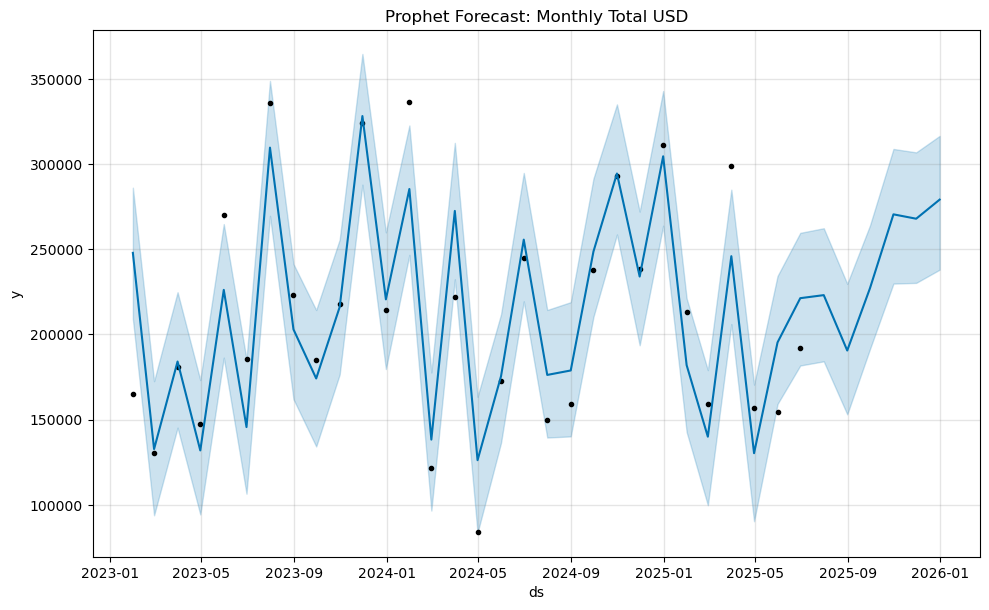

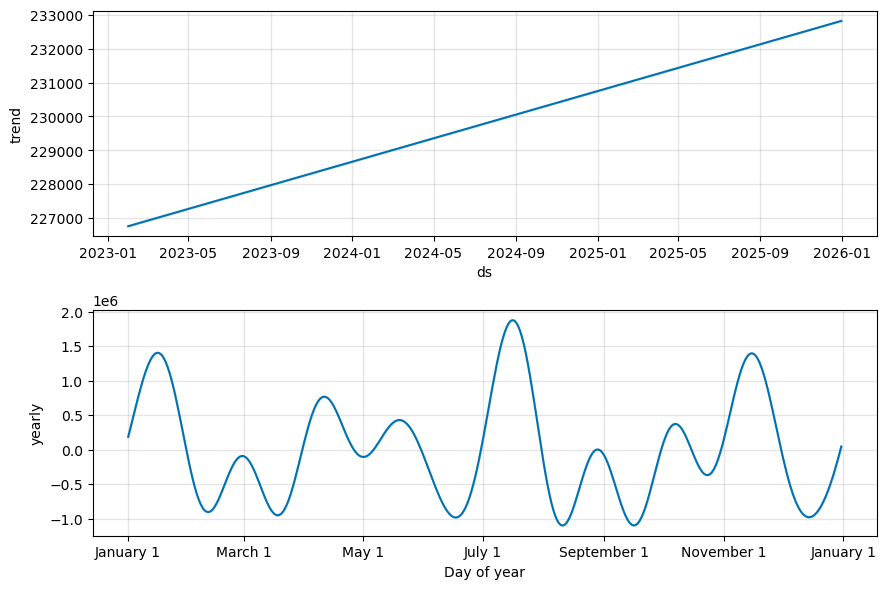

In [81]:
# Plot forecast
fig1_usd = model_usd.plot(forecast_usd)
plt.title('Prophet Forecast: Monthly Total USD')
fig1_usd.savefig(os.path.join(save_path, 'prophet_forecast_total_usd.png'), dpi=300)
plt.show()

# Plot components
fig2_usd = plot_components(model_usd, forecast_usd)
fig2_usd.savefig(os.path.join(save_path, 'prophet_components_total_usd.png'), dpi=300)
plt.show()


#### Prophet Forecast Interpretation – Monthly Total USD (Revenue)

Forecast Overview
- The forecast indicates a steady increase in revenue over the next 6 months, with values rising from ~250,000 USD to nearly 300,000 USD.

- Forecast intervals are relatively wide, reflecting expected monthly variability in large orders or client-specific invoicing.

- Peaks in forecasted revenue generally align with the timing of quantity peaks, reinforcing seasonal restocking and bulk purchasing behavior.

Trend Component
- The trend shows consistent linear growth, similar to the quantity trend. This suggests that both demand and value are increasing proportionally, with no major changes in pricing strategy or average order size.

Seasonality Component
- Revenue seasonality shows strong recurring patterns, with sharp increases around January, mid-year (June–July), and November–December.

- These periods correspond closely with the seasonal spikes seen in the Total Quantity forecast, which implies that Kevala’s revenue is largely driven by fluctuations in volume, rather than shifts in pricing or high-margin item mixes.

Strategic Insight
- Consistency between volume and revenue forecasts supports the reliability of seasonal trends in Kevala’s customer behavior.

This information can guide:

- Cash flow planning aligned to peak income months

- Marketing or discount campaigns in slower revenue periods (e.g., April, August)

- Forecasting margin stability, as growth in quantity and revenue appears proportional

### 12. Export Dataframes

In [86]:
# Define path
data_save_path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis\02 Data\Prepared Data\6.6'
os.makedirs(data_save_path, exist_ok=True)


In [88]:
# Save Total Quantity forecast
forecast.to_csv(os.path.join(data_save_path, 'prophet_forecast_quantity.csv'), index=False)

# Save Total USD forecast
forecast_usd.to_csv(os.path.join(data_save_path, 'prophet_forecast_total_usd.csv'), index=False)